# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости.

## Описание проекта


На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания.



**Цель исследования:** 


Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.


## Подготовка данных

#### Импортируем библиотеки, которые будем использовать в дальнейшем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math

#### Загружаем данные

In [2]:
df = pd.read_csv ('/datasets/real_estate_data.csv', sep='\\t', decimal='.')
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Переименуем столбцы, приведя их к единому стилю.

In [3]:
df = df.rename (columns= {'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Загрузка таблицы прошла успешно, но над корректностью данных ещё предстоит поработать, чем и займемся ниже.

## Предобработка данных

Проверяем столбец со следующей информацией:


` число фотографий квартиры в объявлении`

In [6]:
temp_column = 'total_images'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 50
Минимальное значение 0
Количество пропущенных значений 0


С этими данными все в порядке. Отрицательных значений нет. Ничего не меняем. Переходим к следующему столбцу.

Проверяем столбец со следующей информацией:
` цена на момент снятия с публикации`

In [7]:
temp_column = 'last_price'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 763000000.0
Минимальное значение 12190.0
Количество пропущенных значений 0


Здесь все хорошо.

Проверяем столбец со следующей информацией:
` площадь квартиры в квадратных метрах (м²)`

In [8]:
temp_column = 'total_area'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 900.0
Минимальное значение 12.0
Количество пропущенных значений 0


Здесь все хорошо.

Проверяем столбец со следующей информацией:
`дата публикации`

Тип данных «object», нужно перевести в «datetime».

In [9]:
temp_column = 'first_day_exposition'
try:
    df[temp_column] = pd.to_datetime(df[temp_column], format='%Y.%m.%dT%H:%M:%S')

except: print ('Ошибка при конвертировании данных в столбце:', temp_column)
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Количество пропущенных значений', df[temp_column].isna().sum())


Максимальное значение 2019-05-03 00:00:00
Минимальное значение 2014-11-27 00:00:00
Количество пропущенных значений 0


Проверяем, что тип данных изменился:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

Проверяем столбец со следующей информацией:
`число комнат`

In [11]:
temp_column = 'rooms'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 19
Минимальное значение 0
Количество пропущенных значений 0


Здесь все хорошо.

Проверяем столбец со следующей информацией:
`высота потолков (м)`

In [12]:
temp_column = 'ceiling_height'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 100.0
Минимальное значение 1.0
Медианное значение 2.65
Среднее значение 2.77149889685604
Количество пропущенных значений 9195


В данных много пропусков, и есть явные выбросы. Для того чтобы не искажать данные мы не будем заполнять отсутствующие значения усреднёнными. А при дальнейшем анализе с использованием этого столбца, просто будем использовать только строки в которых есть значения.

Проверяем столбец со следующей информацией:
`всего этажей в доме`

In [13]:
temp_column = 'floors_total'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 60.0
Минимальное значение 1.0
Медианное значение 9.0
Среднее значение 10.67382374115953
Количество пропущенных значений 86


Пропусков немного, но они критичны для следующих вычислений. Предполагаем, что пропуски, это одноэтажные дома. Тогда все жильцы в них будут на первом этаже. Если гипотеза подтвердится, меняем пропуски на «1». Если же нет, просто удаляем эти строки (в связи с их небольшим количеством относительно всего объема данных).

In [14]:
df[df[temp_column].isna()]['floor']

186       4
237       1
457      12
671       8
1757      9
         ..
22542     3
22656    20
22808     6
23590    18
23658     8
Name: floor, Length: 86, dtype: int64

Гипотеза не подтвердилась. Удаляем.

In [15]:
df.dropna(subset = [temp_column], inplace = True)
print('Количество пропущенных значений', df[temp_column].isna().sum())

Количество пропущенных значений 0


Проверяем столбец со следующей информацией:
`жилая площадь в квадратных метрах (м²)`

In [16]:
temp_column = 'living_area'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 409.7
Минимальное значение 2.0
Медианное значение 30.0
Среднее значение 34.46278119449938
Количество пропущенных значений 1870


В данных много пропусков, и есть явные выбросы. Для того чтобы не искажать данные мы не будем заполнять отсутствующие значения усреднёнными. А при дальнейшем анализе с использованием этого столбца, просто будем использовать только строки в которых есть значения.

Проверяем столбец со следующей информацией:
`этаж`

In [17]:
temp_column = 'floor'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 33
Минимальное значение 1
Медианное значение 4.0
Среднее значение 5.877313344344217
Количество пропущенных значений 0


Здесь все хорошо.

Проверяем столбец со следующей информацией:
`апартаменты (булев тип)`

In [18]:
temp_column = 'is_apartment'
print('Количество пропущенных значений', df[temp_column].isna().sum())
print('Столбец состоит из следующих значений')
df[temp_column].value_counts()

Количество пропущенных значений 20838
Столбец состоит из следующих значений


False    2725
True       50
Name: is_apartment, dtype: int64

Столбец почти полностью состоит из пропусков. Возможно будем использовать информацию о том, что объект точно является апартаментами.

Переведем тип из «object» в «bool»

In [19]:
df[temp_column] = df[temp_column].fillna(False)
# Если не добавить эту строчку, то все пустые значения превращаются в «True»


df[temp_column] = df[temp_column].astype(bool)
print ('Проверяем результат')
df.info()

Проверяем результат
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
city_centers_nearest    18104 non-null float64
parks_around_3000       18105 non-null float64
parks_nearest           8045 non-n

Проверяем столбец со следующей информацией:
`квартира-студия (булев тип)`

In [20]:
temp_column = 'studio'
print('Количество пропущенных значений', df[temp_column].isna().sum())
print('Столбец состоит из следующих значений')
df[temp_column].value_counts()

Количество пропущенных значений 0
Столбец состоит из следующих значений


False    23467
True       146
Name: studio, dtype: int64

Здесь все хорошо

Проверяем столбец со следующей информацией:
`свободная планировка (булев тип)`

In [21]:
temp_column = 'open_plan'
print('Количество пропущенных значений', df[temp_column].isna().sum())
print('Столбец состоит из следующих значений')
df[temp_column].value_counts()

Количество пропущенных значений 0
Столбец состоит из следующих значений


False    23546
True        67
Name: open_plan, dtype: int64

Здесь все хорошо

Проверяем столбец со следующей информацией:
`площадь кухни в квадратных метрах (м²)`

In [22]:
temp_column = 'kitchen_area'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 112.0
Минимальное значение 1.3
Медианное значение 9.1
Среднее значение 10.564127771022354
Количество пропущенных значений 2231


Похоже на правду. Оставляем как есть.

Проверяем столбец со следующей информацией:
`число балконов`

In [23]:
temp_column = 'balcony'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 5.0
Минимальное значение 0.0
Медианное значение 1.0
Среднее значение 1.1542075331739883
Количество пропущенных значений 11480


С балконами все просто. Нет данных, нет балкона.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> логично

In [24]:
df[temp_column] = df[temp_column].fillna(0)

Проверяем столбец со следующей информацией:
`название населённого пункта`

In [25]:
temp_column = 'locality_name'
print('Количество пропущенных значений', df[temp_column].isna().sum())
print('Столбец состоит из следующих значений')
df[temp_column].value_counts()

Количество пропущенных значений 48
Столбец состоит из следующих значений


Санкт-Петербург                                      15651
посёлок Мурино                                         520
посёлок Шушары                                         439
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
посёлок при железнодорожной станции Приветнинское        1
деревня Пельгора                                         1
деревня Чудской Бор                                      1
деревня Кривко                                           1
деревня Пижма                                            1
Name: locality_name, Length: 364, dtype: int64

Есть пропуски, но в целом с данными все в порядке.

In [26]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
df['locality_name'].value_counts()

Санкт-Петербург                                      15651
посёлок Мурино                                         520
посёлок Шушары                                         439
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
посёлок при железнодорожной станции Приветнинское        1
деревня Пельгора                                         1
деревня Чудской Бор                                      1
деревня Кривко                                           1
деревня Пижма                                            1
Name: locality_name, Length: 364, dtype: int64

In [28]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace('городской поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('село ', '')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции ', '')
df['locality_name'] = df['locality_name'].str.replace('станции ', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')

df['locality_name'].value_counts()

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
                   ...  
Лесная Поляна          1
Хапо-Ое                1
Жилпоселок             1
Снегиревка             1
Почап                  1
Name: locality_name, Length: 305, dtype: int64

In [29]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Проверяем столбец со следующей информацией:
`расстояние до ближайшего аэропорта в метрах (м)`

In [30]:
temp_column = 'airports_nearest'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 84869.0
Минимальное значение 0.0
Медианное значение 26726.0
Среднее значение 28788.008185387975
Количество пропущенных значений 5532


Есть пропуски, но в целом с данными все в порядке.

Проверяем столбец со следующей информацией:
`расстояние до центра города (м)`

In [31]:
temp_column = 'city_centers_nearest'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 65968.0
Минимальное значение 181.0
Медианное значение 13093.0
Среднее значение 14185.084014582413
Количество пропущенных значений 5509


Есть пропуски, но в целом с данными все в порядке.

Проверяем столбец со следующей информацией:
`число парков в радиусе 3 км`

In [32]:
temp_column = 'parks_around_3000'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 3.0
Минимальное значение 0.0
Медианное значение 0.0
Среднее значение 0.6114333057166529
Количество пропущенных значений 5508


Есть пропуски, но в целом с данными все в порядке.

Проверяем столбец со следующей информацией:
`расстояние до ближайшего парка (м)`

In [33]:
temp_column = 'parks_nearest'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 3190.0
Минимальное значение 1.0
Медианное значение 455.0
Среднее значение 490.5546302050963
Количество пропущенных значений 15568


Есть пропуски, но в целом с данными все в порядке.

Проверяем столбец со следующей информацией:
`число водоёмов в радиусе 3 км`

In [34]:
temp_column = 'ponds_around_3000'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 3.0
Минимальное значение 0.0
Медианное значение 1.0
Среднее значение 0.7701187517260425
Количество пропущенных значений 5508


Есть пропуски, но в целом с данными все в порядке.

Проверяем столбец со следующей информацией:
`расстояние до ближайшего водоёма (м)`

In [35]:
temp_column = 'ponds_nearest'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 1344.0
Минимальное значение 13.0
Медианное значение 503.0
Среднее значение 518.2094691535151
Количество пропущенных значений 14552


Есть пропуски, но в целом с данными все в порядке.

Проверяем столбец со следующей информацией:
`сколько дней было размещено объявление (от публикации до снятия)`

In [36]:
temp_column = 'days_exposition'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())
print('Количество пропущенных значений', df[temp_column].isna().sum())

Максимальное значение 1580.0
Минимальное значение 1.0
Медианное значение 95.0
Среднее значение 180.88483929357665
Количество пропущенных значений 3172


Есть пропуски, но в целом с данными все в порядке.

Проверка на дубликаты:

In [37]:
df.duplicated().sum()

0

# Вывод:
    
    
Поменяли тип данных, в тех столбцах где это было нужно. Заполнили недостающие данные по количеству балконов. Приняли решение не удалять данные с пропусками где это возможно, чтобы сохранить максимум полезной информации, а также не заполнять пропущенные данные усредненными значениями, чтобы не искажать общую картину.


## Расчёты и добавление результатов в таблицу

Вычисляем цену квадратного метра.

In [38]:
try:
    df['price_square_meter'] = df['last_price'] / df['living_area'] 

except: print ('Ошибка при вычислении цены квадратного метра.')

Вычисляем день недели, месяц и год публикации объявления.

In [39]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

Добавляем этаж квартиры; варианты — первый, последний, другой.

In [40]:
def apartment_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой'
 
df['apartment_floor'] = df.apply(apartment_floor, axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличная функция!

Добавляем соотношение жилой и общей площади.

In [41]:
try:
    df['living_total_area'] = df['living_area'] / df['total_area'] 

except: print ('Ошибка при вычислении соотношения жилой и общей площади.')

Добавляем отношение площади кухни к общей площади.

In [42]:
try:
    df['kitchen_total_area'] = df['kitchen_area'] / df['total_area'] 

except: print ('Ошибка при вычислении соотношения площади кухни к общей площади.')

# Вывод.
В таблицу, путем вычисления, были добавлены следующие данные:


•	цена квадратного метра;

•	день недели, месяц и год публикации объявления;

•	этаж квартиры; варианты — первый, последний, другой;

•	соотношение жилой и общей площади, а также отношение площади кухни к общей.


## Исследовательский анализ данных

Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого параметра.

Площадь

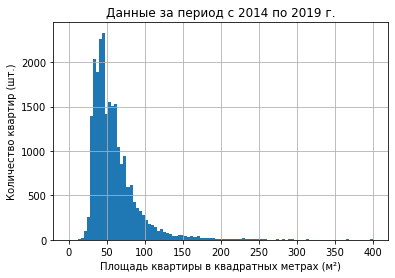

In [43]:
df['total_area'].hist(bins = 100, range = (0, 400))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Площадь квартиры в квадратных метрах (м²)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Внешне диаграмма похожа на распределение Пуассона. Есть незначительные выбросы на площади более 200 м3. Хотя возможно действительно есть такие объекты. В реальной ситуации я бы уточнил этот вопрос у экспертов.

Цена

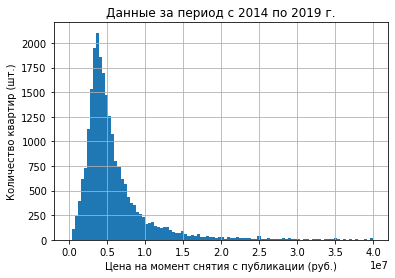

In [44]:
df['last_price'].hist(bins = 100, range = (0, 40000000))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Цена на момент снятия с публикации (руб.)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Картина аналогична гистограмме площади. Меньше 400 000 и больше 20 000 000 это по всей видимости выбросы.

Число комнат

Число объектов с нулевым количеством комнат: 194


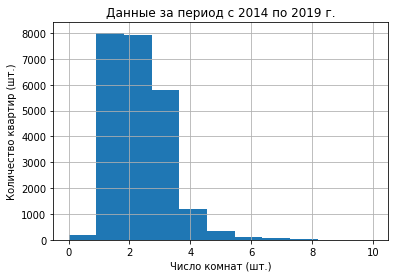

In [45]:
print ('Число объектов с нулевым количеством комнат:', len(df[df['rooms'] == 0]))
df['rooms'].hist(bins = 11, range = (0, 10))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Число комнат (шт.)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Внешне диаграмма похожа на распределение Пуассона. 
Немного смущают объекты с нулевым количеством комнат. Нужно уточнить что это за объекты.

Высота потолков

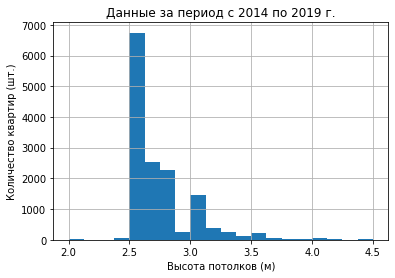

In [46]:
df['ceiling_height'].hist(bins = 20, range = (2, 4.5))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Высота потолков (м)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Основное часть объектов имеет высоту потолков от 2.5 до 3 метров. Меньше 2 и больше 4.5, по моему мнению, это выбросы.

Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. 

In [47]:
temp_column = 'days_exposition'
print('Максимальное значение', df[temp_column].max())
print('Минимальное значение', df[temp_column].min())
print('Медианное значение', df[temp_column].median())
print('Среднее значение', df[temp_column].mean())

Максимальное значение 1580.0
Минимальное значение 1.0
Медианное значение 95.0
Среднее значение 180.88483929357665


AxesSubplot(0.125,0.125;0.775x0.755)


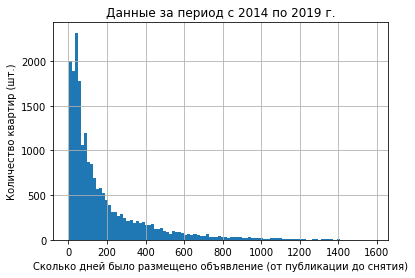

In [48]:
print(df['days_exposition'].hist(bins = 100, range = (1, 1580)))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Сколько дней было размещено объявление (от публикации до снятия)")
pl.ylabel("Количество квартир (шт.)")
plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)


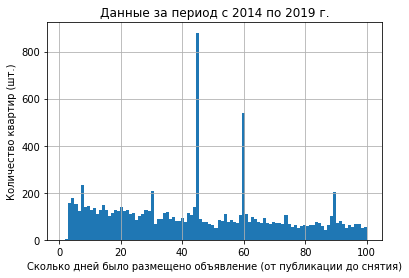

In [49]:
print(df['days_exposition'].hist(bins = 100, range = (1, 100)))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Сколько дней было размещено объявление (от публикации до снятия)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

In [50]:
df[(df['days_exposition']<=60)&(df['days_exposition']>=40)].groupby('days_exposition')['days_exposition'].count()

days_exposition
40.0     92
41.0     76
42.0    113
43.0    107
44.0    138
45.0    880
46.0     90
47.0     77
48.0     77
49.0     69
50.0     61
51.0     51
52.0     84
53.0     81
54.0    110
55.0     75
56.0     86
57.0     74
58.0     71
59.0    106
60.0    538
Name: days_exposition, dtype: int64


Два самых явных пика находятся на 45-от и 60-ом днях публикации.
Остальные на значениях 90, 30 и 7 дней.
По всей видимости это связанно с политикой размещения объявлений.
Предполагаем, что данные объявления просто снимали с публикации, а факта продажи не было. Для нас же важен именно сам факт продажи, в связи с этим убираем эти данные, чтобы они не искажали нам картину.



Внешне диаграмма похожа на распределение Пуассона, смещенное н началу координат и с очень вытянутым хвостом. Взглянем на эти участки внимательнее.

AxesSubplot(0.125,0.125;0.775x0.755)


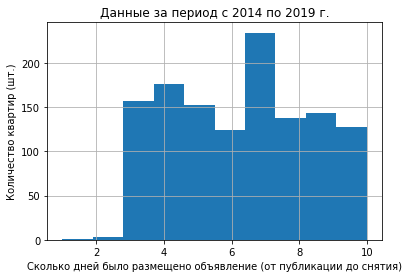

In [51]:
print(df['days_exposition'].hist(bins = 10, range = (1, 10)))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Сколько дней было размещено объявление (от публикации до снятия)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Основные продажи квартир начинаются через 3 дня после публикации. Все что до этого, считаем аномально малым временем.

AxesSubplot(0.125,0.125;0.775x0.755)


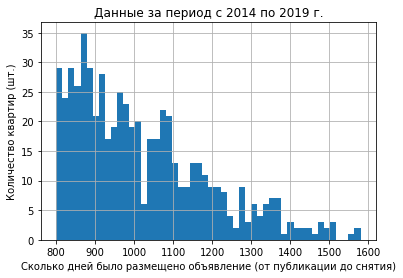

In [52]:
print(df['days_exposition'].hist(bins = 50, range = (800, 1580)))

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Сколько дней было размещено объявление (от публикации до снятия)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Здесь ситуация интереснее. При длительном времени публикации, падение происходит практически линейно. Исходя из здравого смысла можно предположить, что за несколько лет люди просто снимают объявление с публикации. Мы же помним что у нас в данных есть только время публикации, а факт продажи мы никак не можем проверить по этим данным.

В среднем продажа занимает 95 дней. Все что быстрее 3 дней, это очень быстро. Все что дольше 3 лет (спад на 1000 дней), очень долго.

Опираясь на предыдущий анализ уберем из данных следующие аномальные значения:


# Время продажи:

Меньше 3

Равно 7, 30, 45, 60 и 90 дней.

Больше 1000


# Площадь:

Больше 200

Минимум не ограничиваем. 21 метров вполне возможно

# Цена: 

Меньше 400 000 

Больше 20 000 000 

# Высота потолков:

Меньше 2

Больше 4.5

# Число комнат:

Меньше 1

Больше 8


In [53]:
df['days_exposition'] = df['days_exposition'].astype(int, errors='ignore')
df = df[(df['days_exposition']>=3) & (df['days_exposition']<=1000)] # Время продажи
df = df[(df['days_exposition'] != 7)  
         & (df['days_exposition'] != 30)  
         & (df['days_exposition'] != 45)  
         & (df['days_exposition'] != 60)  
         & (df['days_exposition'] != 90)] 
df = df[(df['total_area']<=200)] # Площадь
df = df[(df['last_price']>=400000) & (df['last_price']<=20000000)] # Цена
df = df[(df['ceiling_height']>=2) & (df['ceiling_height']<=4.5)] # Высота потолков
df = df[(df['rooms']>=1) & (df['rooms']<=8)] # Число комнат

# Проверяем, зависит ли цена от:

# площади

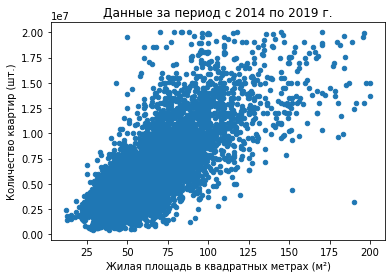

In [54]:
temp_column = 'total_area'
df.plot(x=temp_column, y='last_price', kind='scatter')


pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Жилая площадь в квадратных метрах (м²)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Да, существенно зависит.

In [55]:
print('Корреляция составляет:',"{:.2%}".format(df[temp_column].corr(df['last_price'])))

Корреляция составляет: 77.57%


# числа комнат

In [56]:
display(df.pivot_table(index='rooms', values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
rooms,,,,,
1,3824,490000.0,3.793704e+06,3600000.0,19500000.0
2,3751,450000.0,5.296468e+06,4700000.0,20000000.0
3,2659,850000.0,7.004498e+06,6000000.0,20000000.0
4,483,1200000.0,8.575032e+06,7850000.0,19900000.0
5,102,2850000.0,1.099139e+07,10750000.0,20000000.0
6,23,4390000.0,1.390859e+07,13450000.0,19500000.0
7,3,12000000.0,1.289667e+07,12990000.0,13700000.0


Да, есть зависимость. Чем больше комнат, там больше цена. Все логично.

# удалённости от центра

Корреляция составляет: -0.3595786314947631


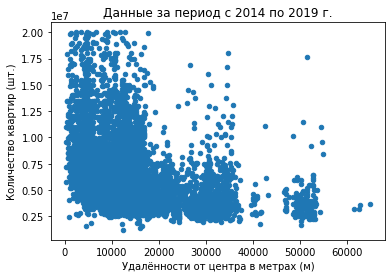

In [57]:
temp_column = 'city_centers_nearest'
df.plot(x=temp_column, y='last_price', kind='scatter')
print('Корреляция составляет:', df[temp_column].corr(df['last_price']))


pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Удалённости от центра в метрах (м)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Есть обратная зависимость, что в общем то логично.

# от того, на каком этаже расположена квартира: первом, последнем или другом

In [58]:
temp_column = 'apartment_floor'
display(df.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
apartment_floor,,,,,
другой,7949,550000.0,5.623469e+06,4750000.0,20000000.0
первый,1378,450000.0,4.348258e+06,3900000.0,20000000.0
последний,1518,490000.0,5.222482e+06,4300000.0,19900000.0


Как и ожидалось, самые дорогие средние этажи, а самый дешевый первый.

# от даты размещения: дня недели

In [59]:
temp_column = 'weekday'
display(df.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
weekday,,,,,
0,1725,600000.0,5.323805e+06,4530000.0,20000000.0
1,1950,560000.0,5.589772e+06,4782500.0,20000000.0
2,1794,450000.0,5.384939e+06,4550000.0,20000000.0
3,2018,490000.0,5.536043e+06,4600000.0,20000000.0
4,1751,600000.0,5.329517e+06,4500000.0,19980000.0
5,872,560000.0,5.179036e+06,4499000.0,18990000.0
6,735,650000.0,5.247006e+06,4450000.0,19800000.0


Зависимости нет.

# от даты размещения: месяца

In [60]:
temp_column = 'month'
display(df.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
month,,,,,
1,686,585000.0,5.384179e+06,4500000.0,19900000.0
2,1274,550000.0,5.436616e+06,4600000.0,19800000.0
3,1108,550000.0,5.150116e+06,4375000.0,19354948.0
4,756,630000.0,5.481167e+06,4600000.0,19950000.0
5,553,490000.0,5.551647e+06,4646000.0,20000000.0
6,774,650000.0,5.274690e+06,4399500.0,19500000.0
7,856,450000.0,5.417452e+06,4590000.0,20000000.0
8,907,500000.0,5.459767e+06,4600000.0,19980000.0


Зависимости нет.

# от даты размещения: года

In [61]:
temp_column = 'year'
display(df.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,37,1700000.0,8.068598e+06,6800000.0,19800000.0
2015,393,1260000.0,5.856743e+06,5100000.0,18900000.0
2016,1214,490000.0,5.684535e+06,4750000.0,20000000.0
2017,3881,560000.0,5.471078e+06,4500000.0,20000000.0
2018,4604,450000.0,5.225366e+06,4500000.0,20000000.0
2019,716,550000.0,5.347044e+06,4790000.0,17000000.0


Есть небольшое повышение стоимости в первые два года наблюдений, но скорее всего это обусловлено небольшим количеством данных.

# Вывод.
Больше всего цена ожидаемо зависит от площади объекта. Немного меньше от числа комнат. Чем ближе к центру тем дороже. Этаж понятно лучше не последний. А вот в датах размещения объявлений существенное влияние внес только год публикации объявлений.


# Анализ 10 населённых пунктов

Выбрали 10 населённых пунктов с наибольшим числом объявлений. 
Посчитали среднюю цену квадратного метра в этих населённых пунктах.
В этих населённых пунктах вывели стоимость объектов с самой высокой и низкой стоимостью.

In [62]:
# Делаем одной строкой, чтобы не создавать отдельные таблицы.

(df.pivot_table( values=['price_square_meter','last_price'],
               index='locality_name',  
               aggfunc=['count','mean','max','min'])
 # приводим в порядок названия столбцов
 .set_axis(['Количество объявлений', '2', '3', 'Средняя цена за м3', 'Самая высокая стоимость жилья', '6', 'Самая низкая стоимость жилья', '8'], axis=1, inplace=False)
 # сортируем по количеству
 .sort_values(by = 'Количество объявлений', ascending=False)
 # берем из них Топ 10
 .head(10)
 # убираем технические столбцы
 .loc[:, ['Количество объявлений','Средняя цена за м3', 'Самая высокая стоимость жилья','Самая низкая стоимость жилья']]
 # сортируем для удобства восприятия информации
 .sort_values(by = 'Самая высокая стоимость жилья', ascending=False)
 # округляем, чтобы привести в более читаемый вид
 .round({'Средняя цена за м3':2}) )

,Количество объявлений,Средняя цена за м3,Самая высокая стоимость жилья,Самая низкая стоимость жилья
locality_name,,,,
Санкт-Петербург,7411,198811.79,20000000.0,1200000.0
Пушкин,171,183537.35,16912000.0,2200000.0
Петергоф,118,143931.86,13700000.0,2100000.0
Колпино,170,132844.24,12750000.0,2100000.0
Шушары,177,154413.40,10100000.0,2000000.0
Всеволожск,211,128208.35,10000000.0,1350000.0
Кудрово,158,194141.17,9950000.0,2100000.0
Парголово,113,199564.53,9140000.0,2500000.0
Гатчина,117,121095.32,7829000.0,1050000.0


Самая дорогая квартира находится в СПБ и стоит 20 000 000.

Самая дешёвая квартира находится в Гатчино и стоит 1 050 000.

# Визуальное представление зависимости цены и расстояния от центра СПБ

Изучаем предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Найдем квартиры в Санкт-Петербурге и для них выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. В итоге построим визуальное представление информации. Она показывает, как цена зависит от удалённости от центра. Определим границу, где зависимость сильно меняется, — это и будет центральная зона.

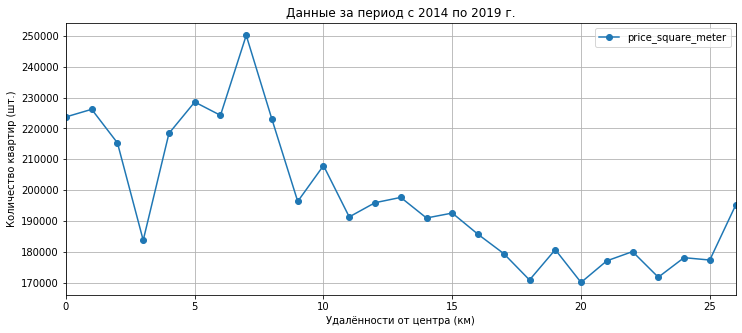

In [63]:
df['SPB_Km'] = round(df['city_centers_nearest']/1000) # округляем километры 
Km_test = 27 # отсекам выброс на 28 км.

(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km < @Km_test)')  # выбираем СПБ 
 .pivot_table( values=['price_square_meter'],  # строим табличку 
               index='SPB_Km',  
               aggfunc='mean')
 .plot(grid=True,style='o-', figsize=(12, 5))) # выводим графику 

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Удалённости от центра (км)")
pl.ylabel("Количество квартир (шт.)")
plt.show()


Явной границы не видно (хотя возможно речь идет про 9 км). Попробуем проявить немного энтузиазма и решим задание немного отходя от сформулированного алгоритма решения.

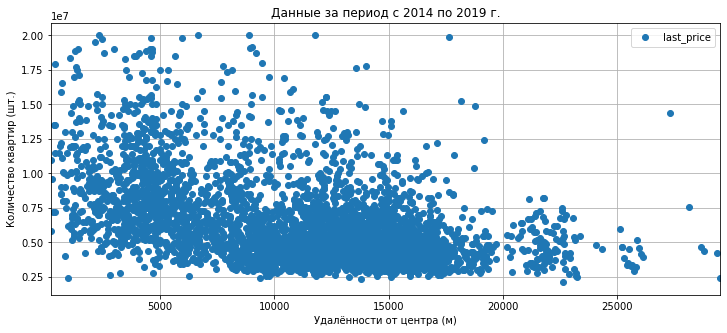

In [64]:
Km_test= 30000 # изменяя эту переменную определяем точную границу. 
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km < @Km_test)')  # выбираем СПБ 
 .pivot_table( values=['last_price'],  # строим табличку 
               index='city_centers_nearest',  
               aggfunc='mean')
 .plot(grid=True,style='o', figsize=(12, 5))) # выводим графику 

pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Удалённости от центра (м)")
pl.ylabel("Количество квартир (шт.)")
plt.show()


Напрашиваются 2 границы, это 20 000 и 24 000 метров от центра. Хм, похоже нашли границы города. Возвращаемся к прошлому решению. Границей центра считаем 9 км.

Выделим сегмент квартир в центре, и проанализируем эту территорию.

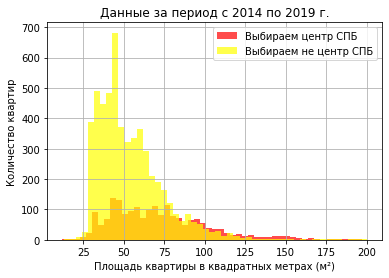

In [65]:
temp_column = 'total_area'
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 [temp_column]).hist( bins = 50, label='Выбираем центр СПБ ', alpha=.7, color='red') 
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 [temp_column]).hist(bins = 50, label='Выбираем не центр СПБ', alpha=.7, color='yellow') 
pl.title(temp_column)
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Площадь квартиры в квадратных метрах (м²)")
pl.ylabel("Количество квартир")
plt.legend()
plt.show()

Основная масса небольших квартир (до 75 метров) продаётся не в центе.

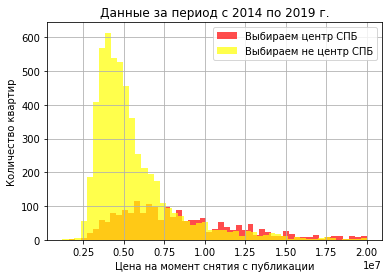

In [66]:
temp_column = 'last_price'
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 [temp_column]).hist( bins = 50, label='Выбираем центр СПБ ', alpha=.7, color='red') 
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 [temp_column]).hist(bins = 50, label='Выбираем не центр СПБ', alpha=.7, color='yellow') 
pl.title(temp_column)
pl.xlabel("Цена на момент снятия с публикации")
pl.ylabel("Количество квартир")
pl.title('Данные за период с 2014 по 2019 г.')
plt.legend()
plt.show()

Ожидаемо в центре квартиры дороже.

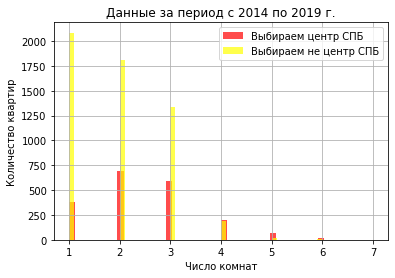

In [67]:
temp_column = 'rooms'
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 [temp_column]).hist( bins = 50, label='Выбираем центр СПБ ', alpha=.7, color='red') 
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 [temp_column]).hist(bins = 50, label='Выбираем не центр СПБ', alpha=.7, color='yellow') 
pl.title(temp_column)
pl.xlabel("Число комнат")
pl.ylabel("Количество квартир")
pl.title('Данные за период с 2014 по 2019 г.')
plt.legend()
plt.show()

Однушку в центре найти будет сложно, а многокомнатную не в центре вообще не реально.

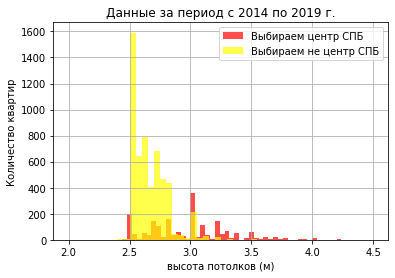

In [68]:
temp_column = 'ceiling_height'
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 [temp_column]).hist( bins = 50, label='Выбираем центр СПБ ', alpha=.7, color='red') 
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 [temp_column]).hist(bins = 50, label='Выбираем не центр СПБ', alpha=.7, color='yellow') 
pl.title(temp_column)
pl.xlabel("высота потолков (м)")
pl.ylabel("Количество квартир")
pl.title('Данные за период с 2014 по 2019 г.')
plt.legend()
plt.show()

Чем дальше от центра, тем ниже потолок))

# Проверим, какие факторы влияют на стоимость квартиры в разрезе центр/не центр СПБ:

# число комнат

Корреляция для центра СПБ составляет: 0.5020158646812204


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
rooms,,,,,
1,382,1850000.0,5.578669e+06,5199999.5,19500000.0
2,692,2800000.0,7.636584e+06,6799500.0,20000000.0
3,596,1600000.0,9.710594e+06,8700000.0,20000000.0
4,202,3690000.0,1.067081e+07,10050000.0,19800000.0
5,73,7500000.0,1.193627e+07,11999000.0,18500000.0
6,19,4390000.0,1.406184e+07,13450000.0,19500000.0
7,3,12000000.0,1.289667e+07,12990000.0,13700000.0


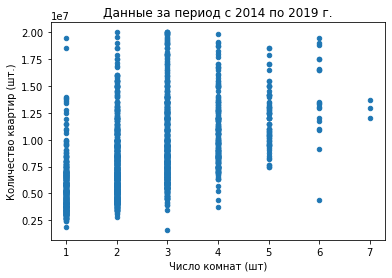

Корреляция для не центра СПБ составляет: 0.5150781087481651


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
rooms,,,,,
1,2085,1400000.0,4.108697e+06,3900000.0,11500000.0
2,1806,1900000.0,5.664402e+06,5100000.0,17671500.0
3,1340,2799000.0,7.143867e+06,6082113.5,20000000.0
4,185,1200000.0,7.876610e+06,6550000.0,19900000.0
5,17,4900000.0,9.502059e+06,9000000.0,20000000.0
6,4,6864000.0,1.318065e+07,14175000.0,17508600.0


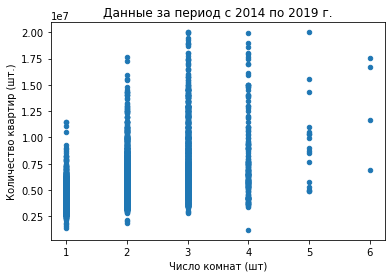

In [69]:
temp_column = 'rooms'
print('Корреляция для центра СПБ составляет:', df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')[temp_column].corr(df['last_price']))
display(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)').pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 ).plot(x=temp_column, y='last_price', kind='scatter')
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Число комнат (шт)")
pl.ylabel("Количество квартир (шт.)")
plt.show()
print('Корреляция для не центра СПБ составляет:', df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')[temp_column].corr(df['last_price']))
display(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)').pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 ).plot(x=temp_column, y='last_price', kind='scatter') 
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Число комнат (шт)")
pl.ylabel("Количество квартир (шт.)")
plt.show()


Факт нахождения в квартиры в центре практически не влияет на корреляцию её стоимости и число комнат.

# этаж

In [70]:
temp_column = 'apartment_floor'
print('Для центра СПБ:')
display(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)').pivot_table(index='apartment_floor', values='last_price', aggfunc=['count','min','mean','median','max']))

print('Для не центра СПБ:')
display(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)').pivot_table(index='apartment_floor', values='last_price', aggfunc=['count','min','mean','median','max']))


Для центра СПБ:


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
apartment_floor,,,,,
другой,1396,1850000.0,8.657175e+06,7900000.0,20000000.0
первый,219,1600000.0,6.622068e+06,5900000.0,20000000.0
последний,352,3100000.0,8.523153e+06,7800000.0,19800000.0


Для не центра СПБ:


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
apartment_floor,,,,,
другой,4315,2080000.0,5.665892e+06,4900000.0,20000000.0
первый,581,1200000.0,4.741602e+06,4300000.0,20000000.0
последний,541,1900000.0,5.245026e+06,4550000.0,19900000.0


В центре чуть больше ценят высокие этажи. Возможно потому что вид лучше))

# удалённость от центра

Корреляция для центра СПБ составляет: -0.2715807641621371


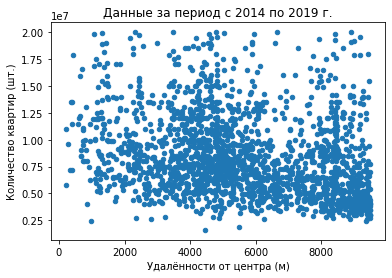

Корреляция для не центра СПБ составляет: -0.11984536881354611


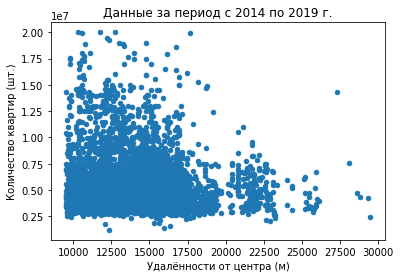

In [71]:
temp_column = 'city_centers_nearest'
print('Корреляция для центра СПБ составляет:', df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')[temp_column].corr(df['last_price']))
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 ).plot(x=temp_column, y='last_price', kind='scatter')
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Удалённости от центра (м)")
pl.ylabel("Количество квартир (шт.)")
plt.show()
print('Корреляция для не центра СПБ составляет:', df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')[temp_column].corr(df['last_price']))
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 ).plot(x=temp_column, y='last_price', kind='scatter') 
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Удалённости от центра (м)")
pl.ylabel("Количество квартир (шт.)")
plt.show()

Чем дальше от центра, тем дешевле недвижимость. Но ближе к центру эта тенденция прослеживается более явно.

# дата размещения объявления

В исследовании выше наибольшую корреляцию показал анализ даты в разрезе года. Поступим здесь аналогично.

Корреляция для центра СПБ составляет: -0.09849506917668353


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,12,5350000.0,1.086980e+07,9050000.0,19800000.0
2015,110,3400000.0,8.528892e+06,7550000.0,18900000.0
2016,263,2750000.0,9.019983e+06,8484000.0,20000000.0
2017,736,2400000.0,8.594859e+06,7625000.0,20000000.0
2018,722,1600000.0,8.060490e+06,7200000.0,20000000.0
2019,124,1850000.0,7.656752e+06,7055000.0,16900000.0


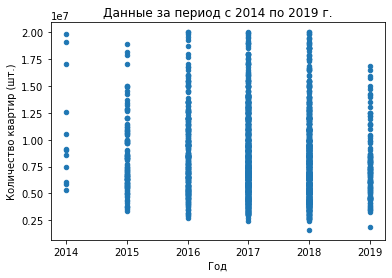

Корреляция для не центра СПБ составляет: -0.007922747044769226


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,14,3364930.0,7.455392e+06,6500000.0,16137000.0
2015,154,2900000.0,5.548489e+06,5013359.5,15888600.0
2016,552,2600000.0,5.493574e+06,4795000.0,17385000.0
2017,1942,1400000.0,5.519920e+06,4727500.0,20000000.0
2018,2355,1200000.0,5.534096e+06,4800000.0,19980000.0
2019,420,2970000.0,5.468993e+06,4950000.0,17000000.0


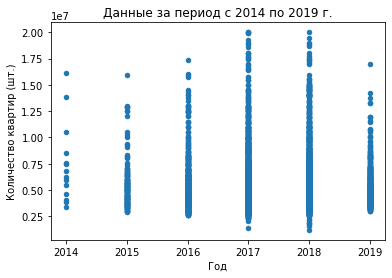

In [72]:
temp_column = 'year'
print('Корреляция для центра СПБ составляет:', df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')[temp_column].corr(df['last_price']))
display(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)').pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km <= 9)')  # выбираем центр СПБ 
 ).plot(x=temp_column, y='last_price', kind='scatter')
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Год")
pl.ylabel("Количество квартир (шт.)")
plt.show()
print('Корреляция для не центра СПБ составляет:', df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')[temp_column].corr(df['last_price']))
display(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)').pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))
(df.query('(locality_name == "Санкт-Петербург")&(SPB_Km > 9)')  # выбираем не центр СПБ 
 ).plot(x=temp_column, y='last_price', kind='scatter') 
pl.title('Данные за период с 2014 по 2019 г.')
pl.xlabel("Год")
pl.ylabel("Количество квартир (шт.)")
plt.show()

В центре города продажи квартир более стабильны и меньше зависят от года.

## Общий вывод

В результате данного исследования данные были предобработаны, проверен каждый столбец, при необходимости изменены типы данных, по возможности были заполнены недостающие данные.
В таблицу, путем вычисления, были добавлены следующие данные:

• цена квадратного метра;

• день недели, месяц и год публикации объявления;

• этаж квартиры; варианты — первый, последний, другой;

• соотношение жилой и общей площади, а также отношение площади кухни к общей.

Изучены следующие параметры: площадь, цена, число комнат, высота потолков. Построены гистограммы для каждого их этих параметров.

Опираясь на этот анализ из данных были удалены аномальные значения.
Были выявлены факторы больше всего влияющие на стоимость квартиры. Это площадь, количество комнат и близость к центру.
Выбрали 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах. В этих населённых пунктах нашли стоимость объектов с самой высокой и низкой стоимостью.
Проанализировав данные нашли границу отделяющую центр от не центра СПБ. Она составила 9 км.


Был проведен анализ сегмента квартир в центре СПБ.
Основные выводы:

• Основная масса небольших квартир (до 75 метров) продаётся не в центе.

• В центре квартиры дороже.

• Чем дальше от центра, тем дешевле недвижимость. Но ближе к центру эта тенденция прослеживается более явно.